# Example of KNN implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

In [2]:
# Function tha calculate the bit error rate (BER) of two vectors with 4 bits
def bit_error_rate(y_pred, y_test):
    y_pred = ''.join([f"{sym:04b}" for sym in y_pred])
    y_test = ''.join([f"{sym:04b}" for sym in y_test])

    # Calculate the BER with the two strings
    return np.sum(np.array(list(y_pred)) != np.array(list(y_test)))/len(np.array(list(y_pred)))

# Function that calculate the symbol error rate (SER) of two vectors
def symbol_error_rate(y_pred, y_test):
    # Calculate the SER
    return np.sum(y_pred!=y_test)/len(y_pred)

## Data preparation

In [3]:
# Generate a random dataset with 2 classes
np.random.seed(0)
X = np.random.randn(1000, 2)
y = np.logical_and(X[:, 0] > 0, X[:, 1] > 0)

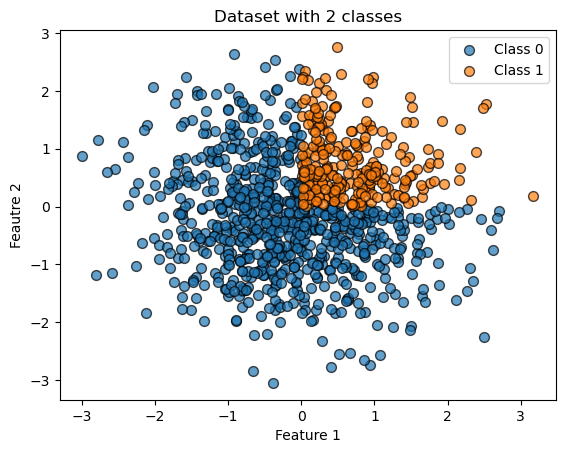

In [4]:
# Show the data in a scatter plot
plt.figure()
plt.title('Dataset with 2 classes')
for i in np.unique(y):
    plt.scatter(X[y == i, 0], X[y == i, 1], s=50, label='Class %d' % i, alpha=0.7, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feautre 2')
plt.legend()
plt.show()

## Application of the KNN method

### Calculate the best K for this scenario

In [5]:
grid_params = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}
grid = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5)
grid.fit(X, y)
print('Best number of neighbors:', grid.best_params_['n_neighbors'])

Best number of neighbors: 9


### Calculate the BER, SER and Accuracy

In [6]:
model = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
kf = KFold(n_splits=5, shuffle=True, random_state=0)
ber = 0
ser = 0

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    ber += bit_error_rate(y_pred, y_test)
    ser += symbol_error_rate(y_pred, y_test)

print('BER:', ber/5)
print('SER:', ser/5)
print('Accuracy:', accuracy_score(y_pred, y_test))

BER: 0.003
SER: 0.012
Accuracy: 0.99
